# Questions

**Question 1: What is Detectron2 and how does it differ from previous object detection frameworks?**
  - Detectron2 is an open-source computer vision library developed by Facebook.
  - It is used for object detection, instance segmentation, keypoint detection and panoptic segmentation.
  - It is built on PyTorch and serves as a flexible and high-performance framework.
  - Earlier frameworks like Detectron v1 were built on Caffe2 which was harder to debug and extend.
  - Detectron2 have Dynamic computation graphs, enable easier debugging and faster prototyping and experimentation.
  - It is optimized for multi-GPU and distributed training.
  - It supports mixed precision training out of the box.

**Question 2: Explain the process and importance of data annotation when working with Detectron2. **
  - Data annotation is the process of labeling images with ground-truth information like bounding boxes, class labels and segmentation masks so Detectron2 models can learn to recognize and localize objects.
  - Process:-
    - Firstly difine what task is to be performed.
    - This determines the annotation format and tools you will use.
    - Now use annotation tool like LabelImg VGG Image Annotator.
    - And save it in `coco` format.
    - Then register the dataset in Detectron2 using `DatasetCatalog` and `MetadataCatalog`.
    - Visualize annotated samples using Detectron2 utilities and check for incorrect labels, missing objects, or wrong class IDs.
  - Importance:-
    - High-quality annotations lead to better object detection and segmentation accuracy.
    - Correct labels help the model learn meaningful features.
    - Accurate annotations are required for model evaluation metrics like `mAp` and `loU`.


**Question 3: Describe the steps involved in training a custom object detection model using Detectron2.**
  - These are the following steps:-
    - Dataset Preparation:-
      - Collect images relevant to the detection task.
      - Annotate images with object labels and bounding boxes.
      - Store annotations in COCO JSON format, which Detectron2 supports natively.
      - Split the dataset into training and validation sets.
    - Dataset Registration:-
      - Register the custom dataset using `DatasetCatalog` for dataset loading and `MetadataCatalog` for class names and metadata.
    - Model Selection:-
      - Choose a pre-defined model architecture from Detectron2’s Model Zoo.
      - Load pre-trained weights to enable transfer learning.
    - Configuration Setup:-
      - Create a configuration file using `get_cfg()`.
      - Set parameters such as :-
        - Number of classes
        - Learning rate
        - Batch size
        - Number of iterations
      - Specify dataset names for training and testing.
    - Data Loader and Augmentation:-
      - Detectron2 automatically creates data loaders.
      - Apply data augmentation techniques.
    - Model Training:-
      - Initialize the DefaultTrainer.
      - Start training using the `.train()` method.
      - The model learns object features from annotated data.
    - Model Evaluation:-
      - Evaluate performance using validation data.
      - Use metrics like `mAP` and `IoU`.
      - It helps in identifying overfitting or underfitting.

**Question 4: What are evaluation curves in Detectron2, and how are metrics like mAP and IoU interpreted?**
  - Evaluation curves are graphical representations used to analyze the performance of an object detection model.
  - In Detectron2, these curves help understand how well the model detects and localizes objects.
  - Some common curves are Precision Recall Curve and Confidence Score Curves.
  - `IoU` :-
    - It measures the overlap between the predicted bounding box and the ground truth box.
    - Its value ranges from 0 to 1.
    - Higher IoU means better localization accuracy.
  - `mAP` :-
    - It is the primary evaluation metric used in Detectron2.
    - Higher mAP indicates means better detection accuracy and fewer false positives and false negatives.

**Question 5: Compare Detectron2 and TFOD2 in terms of features, performance, and ease of use.**
  - Detectron2:-
    - It have highly modular design for customizing models and pipelines.
    - It offers many pre-trained state-of-the-art models like Faster-R-CNN, Mask-R-CNN, RetinaNet.
    - It is designed for distributed training and multi-GPU use.
    - Great at tasks requiring precise localisation such as segmentation and instance detection.
    - Excellent for custom datasets and research experimentation.
    - It is more flexible but can be challenging for beginners due to low-level configuration and PyTorch familiarity requirement.
    - Ideal for if you need to tweak internals of models and architectures.
  - TFOD2:-
    - It integrates with TensorFlow’s ecosystem and tools like TensorBoard, TF Lite.
    - It uses pipeline config files for setting up models and training.
    - It offers a strong mix of speed and accuracy depending on the model.
    - It have models suitable for both real-time detection and high-accuracy tasks.
    - It is easier to start training models via config files without deep code changes.
    - It works with TensorBoard out of the box, and has better built-in tools for deployment workflows.

In [3]:
# Question 6: Write Python code to install Detectron2 and verify the installation.
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

import detectron2
print("Detectron2 version:", detectron2.__version__)

from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

print("Detectron2 setup successful!")

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-1nbis085
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-1nbis085
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
  Using cached yacs-0.1.8-py3-none-any.whl.metadata (639 bytes)
  Using cached fvcore-0.1.5.post20221221.tar.gz (50 kB)
  Preparing metadata (setup.py) ... done
  Using cached iopath-0.1.9-py3-none-any.whl.metadata (370 bytes)
  Using cached hydra_core-1.3.2-py3-none-any.whl.metadata (5.5 kB)
  Using cached black-26.1.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (88 kB)
  Using cached portalocker-3.2.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached pathspec-1.0.3-py3-none-any.whl.metadata (13 

Dummy images created:  ['img_1.jpg', 'img_0.jpg']
COCO annotation file created successfully!


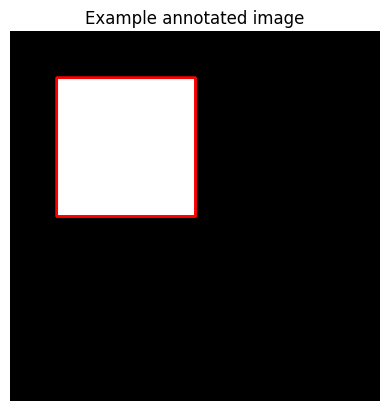

In [5]:
# Question 7: Annotate a dataset using any tool of your choice and convert the annotations to COCO format for Detectron2.

import os
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt

os.makedirs("images", exist_ok=True)

for i in range(2):
    img = np.zeros((400, 400, 3), dtype=np.uint8)
    cv2.rectangle(img, (50, 50), (200, 200), (255, 255, 255), -1)
    cv2.imwrite(f"images/img_{i}.jpg", img)

print("Dummy images created: ", os.listdir("images"))

images = []
annotations = []
categories = [
    {"id": 1, "name": "object"}
]

annotation_id = 1

for image_id, filename in enumerate(os.listdir("images"), start=1):
    images.append({
        "id": image_id,
        "file_name": filename,
        "width": 400,
        "height": 400
    })

    bbox = [50, 50, 150, 150]

    annotations.append({
        "id": annotation_id,
        "image_id": image_id,
        "category_id": 1,
        "bbox": bbox,
        "area": bbox[2] * bbox[3],
        "iscrowd": 0
    })

    annotation_id += 1

coco_format = {
    "images": images,
    "annotations": annotations,
    "categories": categories
}

with open("coco_annotations.json", "w") as f:
    json.dump(coco_format, f, indent=4)

print("COCO annotation file created successfully!")

img = cv2.imread("images/img_0.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

x, y, w, h = bbox
cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(img)
plt.axis("off")
plt.title("Example annotated image")
plt.show()


In [6]:
# Question 8: Write a script to download pretrained weights and configure paths for training in Detectron2.

from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
import os

register_coco_instances(
    "my_dataset_train",
    {},
    "dataset/train/annotations.json",
    "dataset/train/images"
)

register_coco_instances(
    "my_dataset_val",
    {},
    "dataset/val/annotations.json",
    "dataset/val/images"
)

cfg = get_cfg()

cfg.merge_from_file(
    model_zoo.get_config_file(
        "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
    )
)

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
)

cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.OUTPUT_DIR = "./output"

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

print("Pretrained weights loaded from:", cfg.MODEL.WEIGHTS)
print("Training dataset:", cfg.DATASETS.TRAIN)
print("Validation dataset:", cfg.DATASETS.TEST)
print("Configuration completed successfully!")



Pretrained weights loaded from: https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
Training dataset: ('my_dataset_train',)
Validation dataset: ('my_dataset_val',)
Configuration completed successfully!


[01/23 15:48:15 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
W0123 15:48:20.431000 670 torch/fx/_symbolic_trace.py:52] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.


{'instances': Instances(num_instances=100, image_height=400, image_width=400, fields=[pred_boxes: Boxes(tensor([[1.1403e+02, 2.4692e+01, 1.9808e+02, 2.0209e+02],
        [4.2743e+01, 4.6946e+01, 1.9395e+02, 1.9971e+02],
        [6.7963e+01, 0.0000e+00, 4.0000e+02, 3.8571e+02],
        [7.5204e+01, 0.0000e+00, 2.3082e+02, 1.9627e+02],
        [2.1722e+01, 0.0000e+00, 1.8798e+02, 2.9530e+02],
        [3.3839e+02, 0.0000e+00, 4.0000e+02, 4.0000e+02],
        [5.3506e+01, 2.0585e+02, 2.0558e+02, 4.0000e+02],
        [9.4404e+01, 0.0000e+00, 2.5232e+02, 3.5368e+02],
        [2.3541e+02, 0.0000e+00, 4.0000e+02, 3.1077e+02],
        [1.1244e+02, 1.8392e+02, 2.7585e+02, 3.9627e+02],
        [1.4053e+02, 0.0000e+00, 2.9305e+02, 1.8824e+02],
        [4.5491e+01, 1.7255e+02, 2.3341e+02, 3.1314e+02],
        [0.0000e+00, 0.0000e+00, 7.6112e-01, 3.3339e+00],
        [1.5893e+02, 4.6432e+01, 2.6477e+02, 2.5079e+02],
        [1.4513e+02, 1.9520e+02, 3.9981e+02, 3.9998e+02],
        [1.0561e+02, 1.209

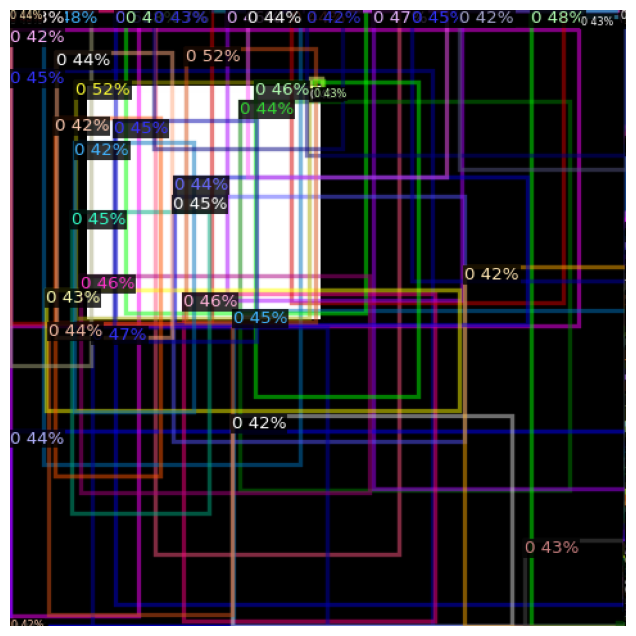

In [11]:
# Question 9: Show the steps and code to run inference using a trained Detectron2 model on a new image.
import cv2
import torch
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
)
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
predictor = DefaultPredictor(cfg)

image_path = "images/img_0.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

outputs = predictor(image)
print(outputs)

metadata = MetadataCatalog.get("my_dataset_train")
v = Visualizer(image_rgb, metadata=metadata, scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(12,8))
plt.imshow(out.get_image())
plt.axis('off')
plt.show()




**Question 10: You are assigned to build a wildlife monitoring system to detect and track different animal species in a forest using Detectron2. Describe the end-to-end pipeline from data collection to deploying the model, and how you would handle challenges like occlusion or nighttime detection.**
  - Data Collection:-
    - We can deploy camera traps, drones, or sensor-equipped cameras in the forest.
    - And collect diverse images and videos covering different species, times of day, and weather conditions.
    - It ensures a balanced dataset with rare and common species to reduce bias.
  - Data Annotation:-
    - Label those images with bounding boxes or segmentation masks for each animal species using tools like LabelMe or Roboflow.
    - Include challenging scenarios like partial occlusion, overlapping animals, and nighttime conditions.
    - Split data into training, validation, and test sets.
  - Data Preprocessing:-
    - Resize images to a consistent resolution suitable for Detectron2 models.
    - Apply data augmentation techniques:-
      - Horizontal flipping, rotation, and cropping.
      - Brightness/contrast adjustments for nighttime and low-light scenarios.
      - Synthetic occlusion to simulate real-world conditions.
  - Model Selection:-
    - Choose a Detectron2 architecture like Faster R-CNN for object detection and Mask R-CNN if instance segmentation is needed.
    - Initialize with pretrained weights on COCO or ImageNet for faster convergence.
  - Model Training:-
    - Configure Detectron2 with custom dataset, class labels and appropriate learning rate, batch size and number of iterations.
    - Use data augmentation during training to improve robustness.
    - Apply transfer learning to leverage existing feature representations.
  - Model Evaluation:-
    - mAP for detection performance.
    - Precision and Recall per species to identify class-wise weaknesses.
  - Model Deployment:-
    - Deploy it on edge devices for real-time detection.
    - Or deploy on a cloud server with a REST API for processing images/videos remotely.
    - Integrate tracking algorithms to monitor individual animals over time.